In this ipynb we would like to judge how does prior beliefs affect the algorithm, for that, we pass a Laplacian with zeros where we want the algorithm to not learn any edge, we will do a plot

for N=10, N=20
for ER, BA, RBF
percentage of prior knowledge vs f-measure with a 1/(N-1) threshold of weights (or with no threshold??)

In [1]:
import sys
sys.path.append('../')
import learnHeat as lh
import learnHeat3 as lh3
from importlib import reload
lh3 = reload(lh3)
lh = reload(lh)
import numpy as np
import matplotlib.pyplot as plt
import scores_table as scort

In [ ]:
trial = np.load("trials.npy")
trial += 1
prior = [1,1/2,1/4,1/8,1/16]
steps = len(prior)
sims = 10
N = 20
tau0 = [2.5,4]
alpha = 0
beta = 0
max_iter = 50
# we have 3 graphs, 10 sims and 11 priors
scores = np.zeros([3,sims,steps,2])

for i in range(sims):
    print (i, end="\r")
    # create graphs
    BA = lh.heat_graph_BA(N)
    ER = lh.heat_graph_ER(N)
    RBF = lh.heat_graph_RBF(N)
    XBA = lh.create_deltas(BA,tau0)
    XER = lh.create_deltas(ER,tau0)
    XRBF = lh.create_deltas(RBF,tau0)
    # do the learning with different prior knowledge
    for j in range(steps):
        print(f"Prior {prior[j]}", end="\r")
        # learn the graphs with prior
        # this is not working, it should
        print("Learning step 1", end="\r")
        res1 = lh3.learn_heat(XBA,lh3.cover_zeros(BA,prior[j]),tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
        print("Learning step 2", end="\r")
        res2 = lh3.learn_heat(XER,lh3.cover_zeros(ER,prior[j]),tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
        print("Learning step 3", end="\r")
        res3 = lh3.learn_heat(XRBF,lh3.cover_zeros(RBF,prior[j]),tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
        # threshold a bitttt
        LeBA = res1["L"]
        LeBA[abs(LeBA)<0.001] = 0
        LeER = res2["L"]
        LeER[abs(LeER)<0.001] = 0
        LeRBF = res3["L"]
        LeRBF[abs(LeRBF)<0.001] = 0
        # compute the fmeasure and appendscoresz
        print("At scores", end="\r")
        scores[0,i,j,0] = scort.scores(LeBA,BA)
        scores[1,i,j,0] = scort.scores(LeER,ER)
        scores[2,i,j,0] = scort.scores(LeRBF,RBF)
        scores[0,i,j,1] = scort.L2_error(LeBA,BA)
        scores[1,i,j,1] = scort.L2_error(LeER,ER)
        scores[2,i,j,1] = scort.L2_error(LeRBF,RBF)
        print(scores)

np.save("justincase.npy",scores)
np.save(f"{trial}_sims_{sims}_steps_{steps}_maxiter_{max_iter}_alpha_{alpha}_beta_{beta}.npy",scores)
np.save("trials.npy",trial)

In [2]:
prior = [1,1/2,1/4,1/8,1/16]

prior_inv = list(map(lambda x: 1-x,prior))

scores = np.load("7_sims_10_steps_5_maxiter_50_alpha_0_beta_0.npy")

scores2 = np.load("6_sims_10_steps_5_maxiter_50_alpha_0.01_beta_0.1.npy")

In [23]:
scores_fmeasure = np.mean(scores[:,:,:,1],axis=1)
scores_fmeasure2 = np.mean(scores2[:,:,:,1],axis=1)

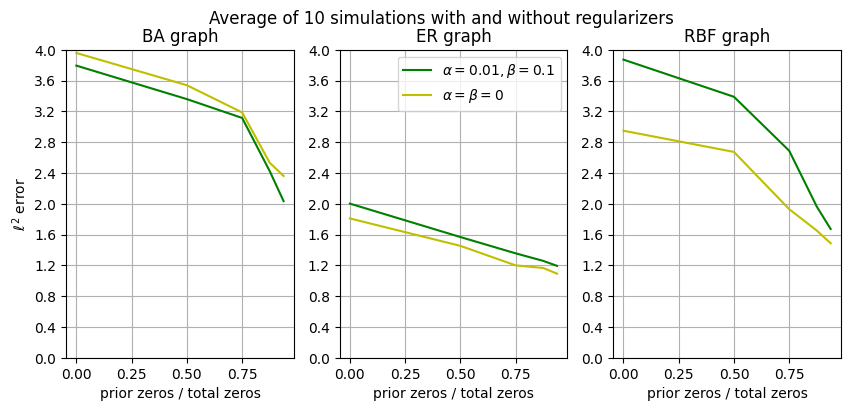

In [29]:
fig, ax = plt.subplots(1,3,figsize=(10,4),sharex=True)
fig.suptitle("Average of 10 simulations with and without regularizers")
titles = ["BA graph","ER graph","RBF graph"]
for r in range(3):
    ax[r].plot(prior_inv,scores_fmeasure[r,:],label=r"$\alpha=0.01,\beta=0.1$",color='g')
    ax[r].plot(prior_inv,scores_fmeasure2[r,:],label=r"$\alpha=\beta=0$",color='y')
    ax[r].set_title(titles[r])
    ax[r].set_xlabel("prior zeros / total zeros")
    ax[r].set_ylim(0,1)
    ax[r].set_yticks(np.linspace(0,4,11))
    ax[r].grid(True)
ax[0].set_ylabel(r"$\ell^2$ error")
ax[1].legend(loc="upper right")

plt.show()


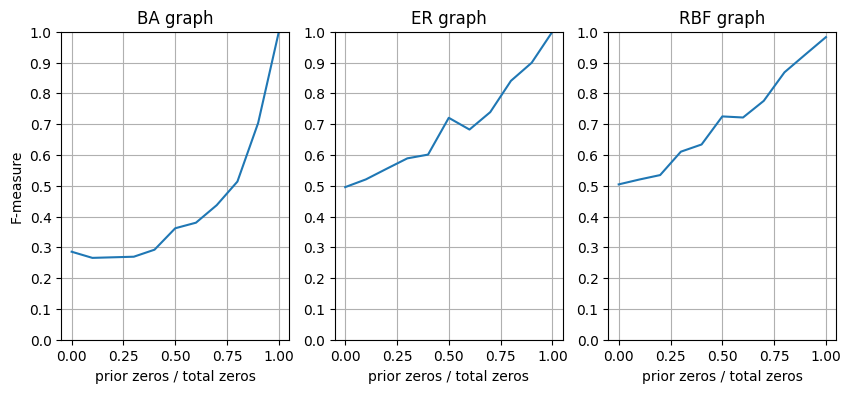

In [42]:
scores3 = np.load("4_sims_1_steps_11_maxiter_50_alpha_0.01_beta_0.1.npy")
fig, ax = plt.subplots(1,3,figsize=(10,4),sharex=True)
titles = ["BA graph","ER graph","RBF graph"]
for r in range(3):
    ax[r].plot(np.linspace(0,1,11),scores3[r,:,::-1].reshape(-1))
    ax[r].set_title(titles[r])
    ax[r].set_xlabel("prior zeros / total zeros")
    ax[r].set_ylim(0,1)
    ax[r].set_yticks(np.linspace(0,1,11))
    ax[r].grid(True)
ax[0].set_ylabel("F-measure")

plt.show()


In [36]:
scores3

array([[[1.        , 0.7037037 , 0.51351351, 0.43678161, 0.38      ,
         0.36190476, 0.29230769, 0.26950355, 0.26760563, 0.26573427,
         0.28571429]],

       [[1.        , 0.89922481, 0.84057971, 0.7388535 , 0.68235294,
         0.72049689, 0.60103627, 0.58883249, 0.55502392, 0.52054795,
         0.49541284]],

       [[0.98245614, 0.92561983, 0.86821705, 0.7755102 , 0.72151899,
         0.725     , 0.63387978, 0.61052632, 0.53456221, 0.52017937,
         0.50434783]]])